## Customer Segmentation Project

Understanding customer behavior is key to optimizing business strategies. 

This project focuses on Customer Segmentation using data analysis techniques to categorize customers based on their Demographic , Psychographic , Behavioural and Geographic . 

By leveraging K - means clustering algorithms and exploratory data analysis, the project helps businesses identify distinct customer groups, enabling personalized marketing, improved customer engagement, and strategic decision-making.

Use Case : This analysis would go through the Customer base and divides it into clusters enabling personalized marketing, improved customer engagement, and strategic decision-making to enahance Brand Awareness , Price Optimization , Enhancing Competitiveness , Acquisition and Retention ultimately increasing revenue nd ROI .  

#### Data Collection & Loading

Importing Libraries

In [3]:
# Importing required Libraries
import numpy as np ;
import pandas as pd ;
import matplotlib.pyplot as plt ;
import seaborn as sns ;
import plotly .express as px ;
import warnings 

warnings.filterwarnings("ignore")

Loading the DataFrame

In [4]:
df = pd.read_csv("Mall_Customers.csv")              # Loading the CSV file for analysis

#### Data Exploration & Cleaning 

In [5]:
Total_rows = df.shape                        # Getting the total number of rows and columns in a Dataset
print(Total_rows)

(200, 5)


In [6]:
df.head(5)                          # Reading the top 5 records of the Dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.tail()                           # Reading the bottom 5 records of the Dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
Column_names = df.columns                           # Reading the colums present in the Dataset
print(Column_names)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [9]:
df.describe().T                     # Getting the overview of  columns present in Dataset 

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [10]:
df.info()                            # Gives the details of the columns of the Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df.dtypes                           # Getting the Datatypes of columns in a dataset

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Checking for null values in Dataset

In [12]:
df.isnull().sum()                   # As checked there are no null values in the Dataset

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Feature selection for model 

In [13]:
# For now we are considering only 2 features - "Annual Income" and "Spending Score" 

x=df.iloc[:,[3,4]].values

Building the Model

In [14]:
# In KMeans Algorithm to decide the optimum cluster number(K) , KMeans uses Elbow method
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation

from sklearn.cluster import KMeans
wcss= []


# We always assume the max number of cluster would be 10

for i in range(1,11):
    kmeans= KMeans(n_clusters=i , init="k-means++" , random_state= 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_);

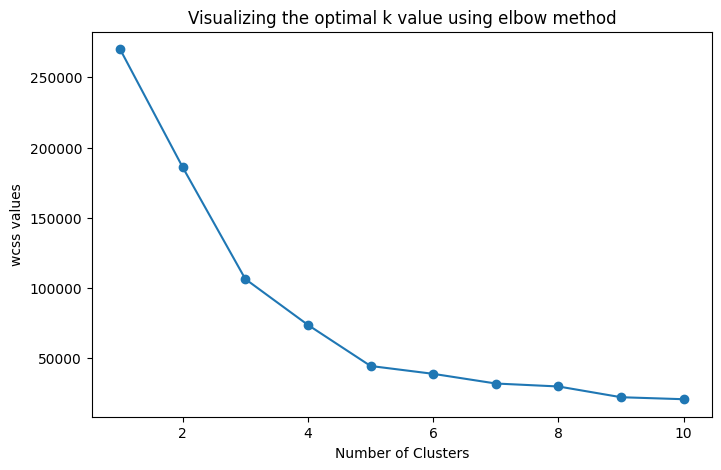

In [18]:
# Visualizing the WCSS values by plotting a graph to find the optimal value of K
plt.figure(figsize=(8,5))
plt.plot(range(1,11),wcss , marker = 'o' , linestyle='-')


# Defining the chart
plt.title("Visualizing the optimal k value using elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss values")


# Showcasing the graph
plt.show()

From the above visualization we can see that there is a last elbow comes at k=5 from where there is no much changes in the value of wcss decline

Here no matter what range we select for k ,  eg- (1,21) also we can select . We will see the same behaviour of the graph but if we chose higher  range then  it becomes a little difficult to visualize the ELBOW that is why we usually prefer range (1,11) 

Finally we have got the value of k=5 .

Model Building 

In [16]:
kmeansmodel = KMeans(n_clusters= 5, init = 'k-means++' , random_state= 0)           # Making the Kmeans model by initializing  K = 5

y_kmeans = kmeansmodel.fit_predict(x)                        # This is a list where each value represents the cluster assigned to a data point.


# For unsupervised learning we use "fit_predict()" wherein for supervised learning we use "fit_tranform()"

# y_kmeans is the final model . Now how and where we will deploy this model in production it depends on what tool we are using.

# This use case is very common and it is used in BFS industry(credit card) and retail for customer segmentation.


Visualizing the above clusters in a Scatter Plot

<function matplotlib.pyplot.show(close=None, block=None)>

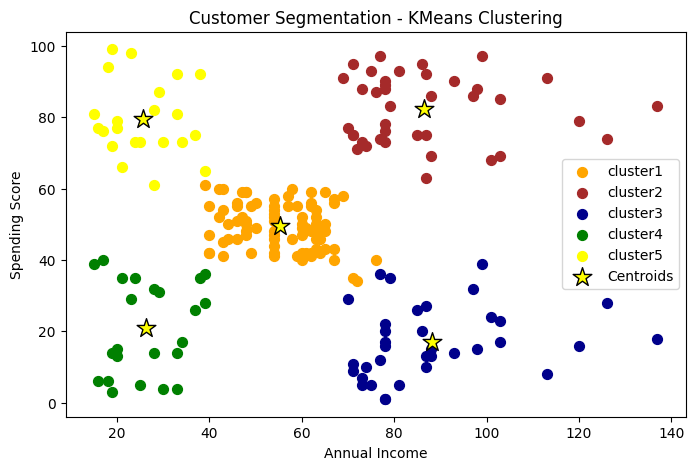

In [19]:
# Plotting canvas for visualization
plt.figure(figsize=(8,5))

# Plotting each data point to different clusters
plt.scatter(x[y_kmeans == 0,0] , x[y_kmeans == 0,1] , c='orange', s= 50 , label = "cluster1") 
plt.scatter(x[y_kmeans == 1,0] , x[y_kmeans == 1,1], c='brown', s = 50, label = "cluster2")
plt.scatter(x[y_kmeans == 2,0] , x[y_kmeans == 2,1] , c='darkblue', s= 50 , label = "cluster3") 
plt.scatter(x[y_kmeans == 3,0] , x[y_kmeans == 3,1] , c='green', s= 50 , label = "cluster4") 
plt.scatter(x[y_kmeans == 4,0] , x[y_kmeans == 4,1] , c='yellow', s= 50 , label = "cluster5") 


# Marking the centroid of each cluster
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s=200, c='yellow', marker='*', edgecolors='black', label='Centroids')


# Customizing the chart
plt.title("Customer Segmentation - KMeans Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show

Model Interpretation

Final Report 

- Cluster 1 (Orange Color) -> average in terms of earning and spending <br>
- Cluster 2 (Brown Color) -> earning high and also spending high [TARGET SET]  <br>
- Cluster 3 (Blue Color) -> earning high but spending less <br>
- Cluster 4 (Green Color) -> Earning less , spending less  <br>
- Cluster 5 (Yellow Color) -> Earning less but spending more<br>


##### We can put Cluster 2 into some alerting system where email can be sent to them on a daily basis as they are easy to converse ######
wherein others we can set like once in a week or once in a month


#### End of the Project